# Formative Assessment 10
### Statistical Theory

> Do a complete data analysis (including APA report) for Cholesterol over Time data set Download Cholesterol over Time data setusing a two-way mixed model ANOVA (BW).

### ANOVA Two-Way Mixed (Introduction)

> A mixed ANOVA compares the mean differences between groups that have been split on two "factors" (also known as independent variables), where one factor is a "within-subjects" factor and the other factor is a "between-subjects" factor. 

> For example, a mixed ANOVA is often used in studies where you have measured a dependent variable (e.g., "back pain" or "salary") over two or more time points or when all subjects have undergone two or more conditions (i.e., where "time" or "conditions" are your "within-subjects" factor), but also when your subjects have been assigned into two or more separate groups (e.g., based on some characteristic, such as subjects' "gender" or "educational level", or when they have undergone different interventions). 

> These groups form your "between-subjects" factor. The primary purpose of a mixed ANOVA is to understand if there is an interaction between these two factors on the dependent variable.

### Cholesterol_R2 Dataset Overview

> **The provided dataset contains information about cholesterol levels before and after a dietary intervention involving different types of margarine. The columns in the dataset include:**
> + ID: Unique identifier for each participant.> 
> + Before: Cholesterol level (in mmol/L) before the intervention.
> + After4weeks: Cholesterol level after 4 weeks of using a specific type of margarine.
> + After8weeks: Cholesterol level after 8 weeks of using the margarine.
> + Margarine: Type of margarine used in the intervention (e.g., A, B, etc.).

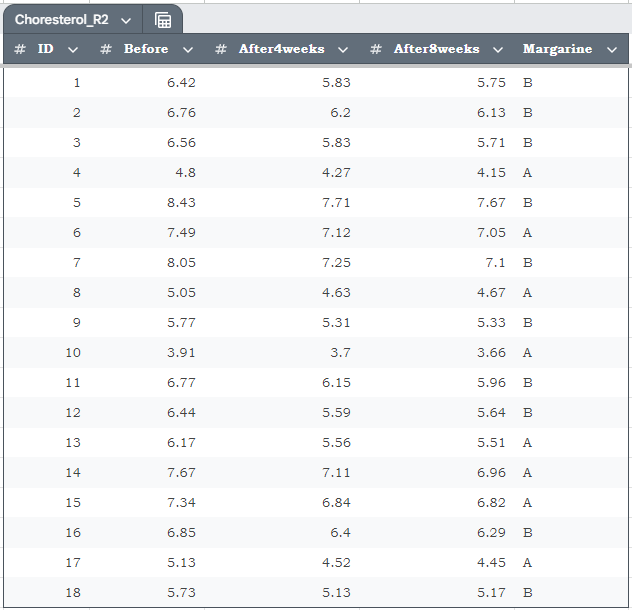
### Statement of the Problem
> **This analysis investigates cholesterol levels in two margarine brands across three time points.
The study aims to determine if there are significant differences in cholesterol levels based on:**
> * (1) The type of margarine (Brand A vs. Brand B).
> * (2)The time of measurement.
> * (3) An interaction between brand and time.
> 
> **The researcher aims to investigate the effect of different types of margarine on cholesterol reduction over time. Participants were divided into groups based on the type of margarine they consumed (Margarine, an independent variable). Their cholesterol levels were measured at three time points: before the intervention, after 4 weeks, and after 8 weeks (Before, After4weeks, and After8weeks, dependent variables).**

### Hypothesis of the Study

#### $H_0$: Null Hypothesis
> * (1) There is no significant difference in cholesterol levels between the two margarine brands.
> * (2) There is no significant difference in cholesterol levels across the three time points.
> * (3) There is no significant interaction between margarine brand and time.

#### $H_A$: Alternative Hypothesis
> * (1) There is significant difference in cholesterol levels between the two margarine brands.
> * (2) There is significant difference in cholesterol levels across the three time points.
> * (3) There is significant interaction between margarine brand and time.

### Assumptions for ANOVA Two-Way Mixed
> * (1) You have a continuous dependent variable.
> * (2) You have one between-subjects factor (i.e., independent variable) that is categorical with two or more categories.
> * (3) You have one within-subjects factor (i.e., independent variable) that is categorical with two or more categories.
> * (4) There should be no significant outliers in any cell of the design.
> * (5) The dependent variable should be approximately normally distributed for each cell of the design
> * (6) The variance of your dependent variable should be equal between the groups of the between-subjects factor, referred to as the assumption of homogeneity of variances.
> * (7) There should be homogeneity of covariances.
> * (8) The variance of the differences between groups should be equal, referred to as the assumption of sphericity.

## Assumption Checks

### Step 1: Import Neccesary Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, kruskal, chi2
## from pingouin import sphericity
from statsmodels.stats.anova import AnovaRM
from statsmodels.multivariate.manova import MANOVA

### Step 2: Load out the Dataset

In [17]:
df = pd.read_csv(r"C:\Users\spike\Downloads\Cholesterol_R2.csv")
df

,ID,Before,After4weeks,After8weeks,Margarine
0,1,6.42,5.83,5.75,B
1,2,6.76,6.20,6.13,B
2,3,6.56,5.83,5.71,B
3,4,4.80,4.27,4.15,A
4,5,8.43,7.71,7.67,B
5,6,7.49,7.12,7.05,A
6,7,8.05,7.25,7.10,B
7,8,5.05,4.63,4.67,A
8,9,5.77,5.31,5.33,B
9,10,3.91,3.70,3.66,A


### Step 3.1: Dependent Variable `Choresterol`

> **The dependent variable is cholesterol levels recorded in `Before`, `After4weeks`, and `After8weeks` and they are all continious**

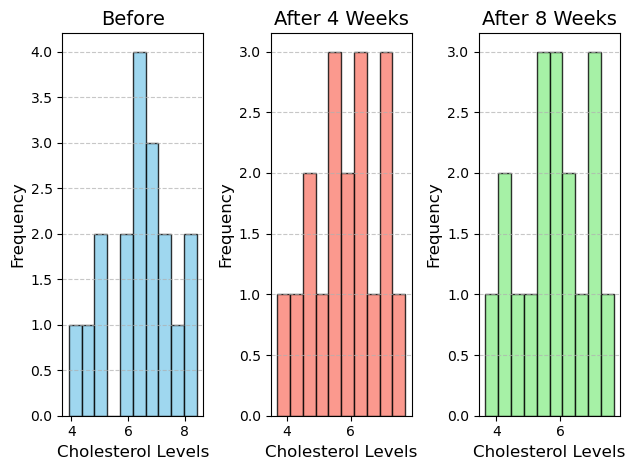

In [19]:
# Histogram for "Before"
plt.subplot(1, 3, 1)
plt.hist(df['Before'], bins=10, color='skyblue', edgecolor='black', alpha=0.8)
plt.title("Before", fontsize=14)
plt.xlabel("Cholesterol Levels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for "After4weeks"
plt.subplot(1, 3, 2)
plt.hist(df['After4weeks'], bins=10, color='salmon', edgecolor='black', alpha=0.8)
plt.title("After 4 Weeks", fontsize=14)
plt.xlabel("Cholesterol Levels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for "After8weeks"
plt.subplot(1, 3, 3)
plt.hist(df['After8weeks'], bins=10, color='lightgreen', edgecolor='black', alpha=0.8)
plt.title("After 8 Weeks", fontsize=14)
plt.xlabel("Cholesterol Levels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Step 3.2: Existence of Between-Subject Factors in `Margarine`

> **The between-subjects factor is the brand of margarine and has 2 categories (B and A).**

### Step 3.3: Existence of Within-Subject Factors in `Margarine`

> **The within-subjects factor is time and has 3 categorical levels:**
> + **Before**
> + **After4weeks**
> + **After8weeks**

### Step 3.4a: Check for any significant outliers within and between subjects

   ID Margarine    Time  Cholesterol
0   1         B  Before         6.42
1   2         B  Before         6.76
2   3         B  Before         6.56
3   4         A  Before         4.80
4   5         B  Before         8.43


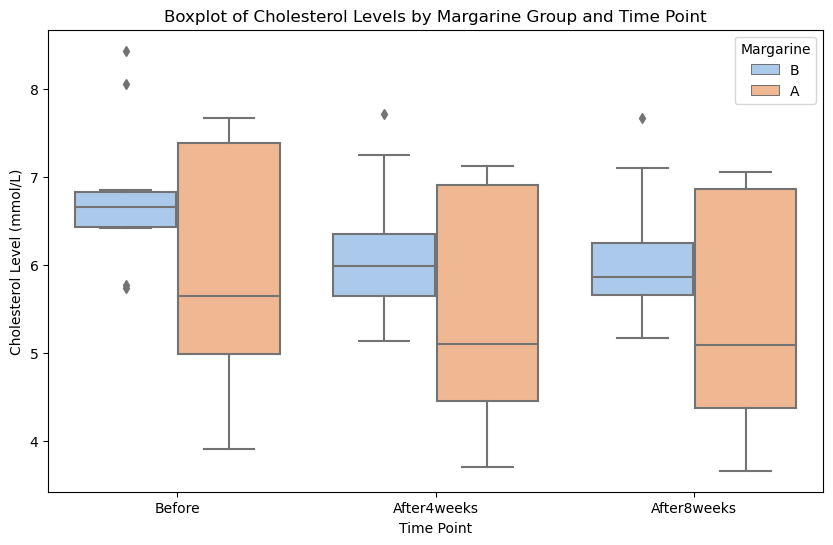

In [23]:
# Reshape the data to a long format
data_long = df.melt(id_vars=['ID', 'Margarine'], 
                      value_vars=['Before', 'After4weeks', 'After8weeks'], 
                      var_name='Time', value_name='Cholesterol')

# Verify the structure of the reshaped data
print(data_long.head())

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', y='Cholesterol', hue='Margarine', data=data_long, palette='pastel')
plt.title('Boxplot of Cholesterol Levels by Margarine Group and Time Point')
plt.xlabel('Time Point')
plt.ylabel('Cholesterol Level (mmol/L)')
plt.legend(title='Margarine', loc='upper right')
plt.show()

### Step 3.4b: Manually list every outliers detected from Step 3.4a

In [25]:
# Function to find outliers based on IQR
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Detect outliers for each column grouped by 'Margarine'
outliers = {}
for column in ["Before", "After4weeks", "After8weeks"]:
    outliers[column] = {}
    for group in df["Margarine"].unique():
        group_data = df[df["Margarine"] == group][column]
        outliers[column][group] = find_outliers(group_data)

# Displaying the outliers
for column, groups in outliers.items():
    print(f"\nColumn: {column}")
    for group, outlier_values in groups.items():
        if outlier_values.empty:
            print(f"  Margarine '{group}': No outliers")
        else:
            print(f"  Margarine '{group}': Outliers - {', '.join(map(str, outlier_values.values))}")


Column: Before
  Margarine 'B': Outliers - 8.43, 8.05, 5.77, 5.73
  Margarine 'A': No outliers

Column: After4weeks
  Margarine 'B': Outliers - 7.71
  Margarine 'A': No outliers

Column: After8weeks
  Margarine 'B': Outliers - 7.67
  Margarine 'A': No outliers


### Step 3.4c: Remove every outliers, since they are significant outliers that fails Assumption 3

In [27]:
# Replace specific outliers with NaN
outliers_to_replace = {
    "Before": {"B": [8.43, 8.05, 5.77, 5.73]},
    "After4weeks": {"B": [7.71]},
    "After8weeks": {"B": [7.67]}
}

# Iterate through the outliers and replace them with NaN
for column, groups in outliers_to_replace.items():
    for group, values in groups.items():
        df.loc[(df["Margarine"] == group) & (df[column].isin(values)), column] = np.nan

# Display the updated dataset
print("Updated Dataset (Outliers Replaced with NaN):")
df

Updated Dataset (Outliers Replaced with NaN):


,ID,Before,After4weeks,After8weeks,Margarine
0,1,6.42,5.83,5.75,B
1,2,6.76,6.20,6.13,B
2,3,6.56,5.83,5.71,B
3,4,4.80,4.27,4.15,A
4,5,NaN,NaN,NaN,B
5,6,7.49,7.12,7.05,A
6,7,NaN,7.25,7.10,B
7,8,5.05,4.63,4.67,A
8,9,NaN,5.31,5.33,B
9,10,3.91,3.70,3.66,A


   ID Margarine    Time  Cholesterol
0   1         B  Before         6.42
1   2         B  Before         6.76
2   3         B  Before         6.56
3   4         A  Before         4.80
4   5         B  Before          NaN


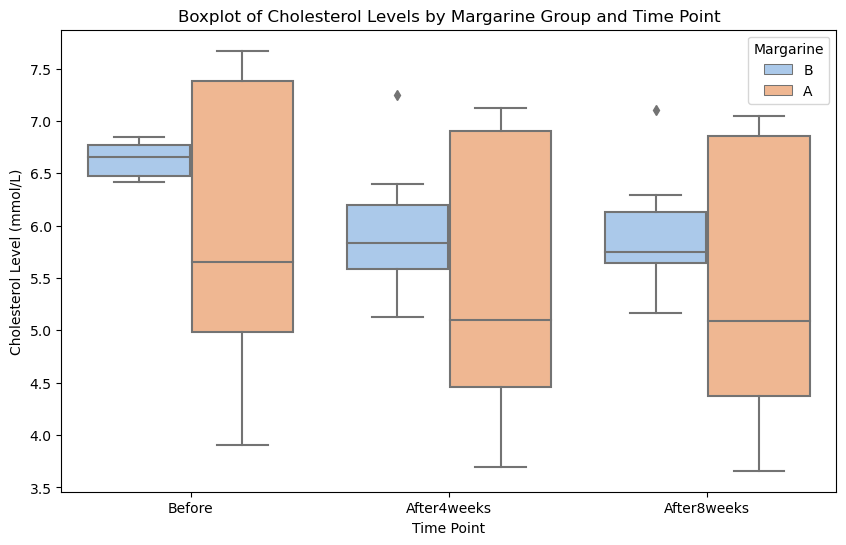

In [28]:
# Reshape the data to a long format
data_long = df.melt(id_vars=['ID', 'Margarine'], 
                      value_vars=['Before', 'After4weeks', 'After8weeks'], 
                      var_name='Time', value_name='Cholesterol')

# Verify the structure of the reshaped data
print(data_long.head())

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', y='Cholesterol', hue='Margarine', data=data_long, palette='pastel')
plt.title('Boxplot of Cholesterol Levels by Margarine Group and Time Point')
plt.xlabel('Time Point')
plt.ylabel('Cholesterol Level (mmol/L)')
plt.legend(title='Margarine', loc='upper right')
plt.show()

### Step 3.5:  The Dependent variable `Choresterol` should be approximately normally distributed through `Shapiro-Wilk Test`

#### $H_0$ for Assumption 5:
> **The data is normally distributed**
> whenever the Shapiro-Wilk Test's p-value > 0.05 then fail to reject $H_0$

#### $H_A$ for Assumption 5:
> **The data is not normally distributed**
> whenever the Shapiro-Wilk Test's p-value <= 0.05 then reject $H_A$

In [30]:
# Initialize a dictionary to store normality test results
normality_results_no_na = []

# Loop through the groups and perform Shapiro-Wilk test, ignoring NaN values
for margarine in df['Margarine'].unique():
    for time in ['Before', 'After4weeks', 'After8weeks']:
        # Filter data for the specific group and time, excluding NaN
        group_data = df[(df['Margarine'] == margarine) & (~df[time].isna())][time]
        
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(group_data)
        
        # Store the results as a tuple (Margarine, Time, p-value)
        normality_results_no_na.append((margarine, time, p_value))

# Convert results to a DataFrame for better display
normality_df = pd.DataFrame(normality_results_no_na, columns=['Margarine', 'Time', 'p-value'])

normality_df

,Margarine,Time,p-value
0,B,Before,0.270261
1,B,After4weeks,0.692038
2,B,After8weeks,0.523363
3,A,Before,0.292168
4,A,After4weeks,0.154353
5,A,After8weeks,0.173833


#### All independent groups and its repeated conditions, all data are follows `Normality` under the `Shapiro-Wilk Test`

## Assumption 6

In [61]:
# Reshape the data to long format for analysis
data_long = pd.melt(df, id_vars=['Margarine'], value_vars=['Before', 'After4weeks', 'After8weeks'],
                    var_name='Time', value_name='Cholesterol')

# Remove rows with NaN values
data_long_cleaned = data_long.dropna(subset=['Cholesterol'])

# Perform Levene's Test for homogeneity of variances for each time point
levene_results = {}

for time in data_long_cleaned['Time'].unique():
    # Filter data by time
    group_A = data_long_cleaned[(data_long_cleaned['Margarine'] == 'A') & (data_long_cleaned['Time'] == time)]['Cholesterol']
    group_B = data_long_cleaned[(data_long_cleaned['Margarine'] == 'B') & (data_long_cleaned['Time'] == time)]['Cholesterol']
    
    # Perform Levene's Test
    stat, p_value = levene(group_A, group_B)
    
    # Store the results
    levene_results[time] = p_value

# Display the results in tabular format
levene_results_df = pd.DataFrame(list(levene_results.items()), columns=['Time', 'Levene p-value'])
levene_results_df

,Time,Levene p-value
0,Before,0.002071
1,After4weeks,0.017995
2,After8weeks,0.009647


If the assumption of homogeneity of variances is violated, it means the variability of your dependent variable is not equal across the groups of your independent variable. This violation can affect the reliability of statistical tests that assume equal variances, such as ANOVA.

 Use a Robust Statistical Test
kruskal-Wallis Test: A non-parametric alternative if the data also violates normality.

In [82]:
# Perform Kruskal-Wallis test
groups = [group['Cholesterol'].values for name, group in data_long_cleaned.groupby('Margarine')]
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis test statistic: 1.6610008866210715, p-value: 0.19746824033636115


## Assumption 7

In [74]:
# Group the data by Margarine
groups = df.groupby('Margarine')

# Create covariance matrices for each group
cov_matrices = [group[['Before', 'After4weeks', 'After8weeks']].cov() for _, group in groups]

# Calculate pooled covariance matrix
pooled_cov = sum((len(group) - 1) * cov for group, cov in zip(groups, cov_matrices)) / (len(data_long) - len(cov_matrices))

# Box's M test implementation
def box_m_test(cov_matrices, pooled_cov, group_sizes):
    num_groups = len(cov_matrices)
    pooled_cov_inv = np.linalg.inv(pooled_cov)
    log_determinants = [np.linalg.slogdet(cov)[1] for cov in cov_matrices]
    pooled_log_determinant = np.linalg.slogdet(pooled_cov)[1]
    
    # Calculate M
    M = (len(data_long) - num_groups) * (pooled_log_determinant - sum(log_determinants[i] * group_sizes[i] / sum(group_sizes) for i in range(num_groups)))
    
    # Calculate chi-squared approximation
    df = 0.5 * (num_groups - 1) * (len(cov_matrices[0]) + 1) * len(cov_matrices[0])
    p_value = chi2.sf(M, df)
    return M, p_value

# Group sizes
group_sizes = [len(group) for _, group in groups]

# Perform Box's M test
box_m, p_value = box_m_test(cov_matrices, pooled_cov, group_sizes)

print(f"Box's M statistic: {box_m}")
print(f"p-value: {p_value}")

if p_value > 0.05:
    print("The assumption of homogeneity of covariances is met.")
else:
    print("The assumption of homogeneity of covariances is violated.")

Box's M statistic: -373.3157853321275
p-value: 1.0
The assumption of homogeneity of covariances is met.


## Assumption 8

## ANOVA TESTING

In [2]:
from pingouin import sphericity
sphericity_results = sphericity(df_long, dv='Cholesterol', subject='Subject', within='Time')
print(f"Sphericity Results: {sphericity_results}")

ModuleNotFoundError: No module named 'pingouin'

# Reporting


In [1]:
! python --version

Python 3.11.4
